# Optical Interconnection Network Regression

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load dataframe (df)

In [2]:
# Load dataframe (df) into appropriate format
df = pd.read_csv('optical_interconnection_network.csv', sep=';', decimal=',')
# Remove unnamed columsn identified by (;)
df = df.loc[:, ~df.columns.str.match('^Unnamed')]

### 2.2. Analyze dataframe

In [3]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,UN,Client-Server,0.1,0.839546,1.974686,308.491814,700.514102,0.352431
1,64,4,UN,Client-Server,0.2,0.827412,9.556437,291.037663,864.599227,0.506302
2,64,4,UN,Client-Server,0.3,0.802605,27.027618,264.928002,839.372851,0.638516
3,64,4,UN,Client-Server,0.4,0.723403,61.848511,235.776888,1256.053108,0.767051
4,64,4,UN,Client-Server,0.5,0.721210,121.085884,189.680044,1343.875577,0.807812
...,...,...,...,...,...,...,...,...,...,...
635,16,10,PS,Asynchronous,0.6,0.792340,532.737732,363.094043,1214.057768,0.961042
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
637,16,10,PS,Asynchronous,0.8,0.618230,905.326843,206.922631,1421.304936,0.962500
638,16,10,PS,Asynchronous,0.9,0.564482,1048.269897,154.713952,2371.043062,0.979375


#### Spatial Distribution:

- UN: Uniform
- HR: Hot Region
- BR: Bit Reverse
- PS: Perfect Shuffle

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    float64
 5   Processor Utilization   640 non-null    float64
 6   Channel Waiting Time    640 non-null    float64
 7   Input Waiting Time      640 non-null    float64
 8   Network Response Time   640 non-null    float64
 9   Channel Utilization     640 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 50.1+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Node Number               0
Thread Number             0
Spatial Distribution      0
Temporal Distribution     0
T/R                       0
Processor Utilization     0
Channel Waiting Time      0
Input Waiting Time        0
Network Response Time     0
Channel Utilization       0
dtype: int64

In [6]:
df.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.000000,7.000000,0.550000,0.649013,377.459157,333.247102,1504.247529,26.347886
std,24.018772,2.237817,0.287453,0.194737,381.974899,233.721860,1202.606968,223.782214
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,0.529210,0.136979
25%,16.000000,5.500000,0.300000,0.492530,29.247560,137.730986,580.676198,0.587539
50%,40.000000,7.000000,0.550000,0.624787,265.614624,261.855556,1232.150369,0.773611
75%,64.000000,8.500000,0.800000,0.833106,664.965408,485.943680,2115.326618,0.905573
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,2895.323131


### 2.3. Clean data

In [7]:
# Sort dataframe according to Channel Utilization
df_sorted = df.sort_values(by=['Channel Utilization'])

In [8]:
df_sorted.tail(15)

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
159,64,10,PS,Client-Server,1.0,0.509802,1211.382568,147.265376,5919.152636,0.980382
639,16,10,PS,Asynchronous,1.0,0.515257,1184.647461,136.375081,2592.966463,0.980903
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
477,16,10,PS,Client-Server,0.8,0.635748,928.996765,176.748269,2980.861045,0.982778
478,16,10,PS,Client-Server,0.9,0.574563,1072.681763,152.513064,3372.189353,0.990312
120,64,4,PS,Client-Server,0.1,0.828573,1.934532,281.991851,0.529210,607.869882
121,64,4,PS,Client-Server,0.2,0.824084,9.550200,262.127869,0.633802,902.966929
122,64,4,PS,Client-Server,0.3,0.795685,26.339130,239.734762,0.718047,1042.409722
124,64,4,PS,Client-Server,0.5,0.695053,126.209816,176.588953,0.822266,1202.936709
123,64,4,PS,Client-Server,0.4,0.739597,56.360073,230.163026,0.778299,1219.612435


In [9]:
# Remove last 10 rows of sorted dataframe
# These are outliers in which the Channel Utilization is over 100%
# (does not make sense)
df_sorted.drop(df_sorted.tail(10).index, inplace=True)

In [10]:
df_sorted

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
560,16,4,BR,Asynchronous,0.1,0.442501,1.013195,381.615554,19.110126,0.136979
240,64,4,BR,Asynchronous,0.1,0.590286,1.474199,313.118038,26.502746,0.137726
570,16,6,BR,Asynchronous,0.1,0.487785,1.119696,498.820922,19.484081,0.149965
250,64,6,BR,Asynchronous,0.1,0.648118,1.745482,501.624530,21.445301,0.151797
580,16,8,BR,Asynchronous,0.1,0.508909,1.348418,652.238802,18.983249,0.153542
...,...,...,...,...,...,...,...,...,...,...
159,64,10,PS,Client-Server,1.0,0.509802,1211.382568,147.265376,5919.152636,0.980382
639,16,10,PS,Asynchronous,1.0,0.515257,1184.647461,136.375081,2592.966463,0.980903
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
477,16,10,PS,Client-Server,0.8,0.635748,928.996765,176.748269,2980.861045,0.982778


In [11]:
df_sorted.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,39.619048,7.047619,0.550000,0.649192,380.302534,335.783999,1528.112170,0.721877
std,24.016044,2.223080,0.287456,0.195312,383.702712,234.523491,1196.975056,0.203917
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,18.983249,0.136979
25%,16.000000,6.000000,0.300000,0.492629,29.551503,137.952154,610.232346,0.585052
50%,16.000000,8.000000,0.550000,0.624115,269.269196,264.890081,1263.970861,0.769844
75%,64.000000,10.000000,0.800000,0.835392,668.430801,495.312932,2125.945976,0.901231
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,0.990312


In [12]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df_sorted.iloc[:, :-1].values, df_sorted.iloc[:, -1].values

print(X.shape, y.shape)

(630, 9) (630,)


### 2.4. Visualize data

#### Pairwise relationships between features

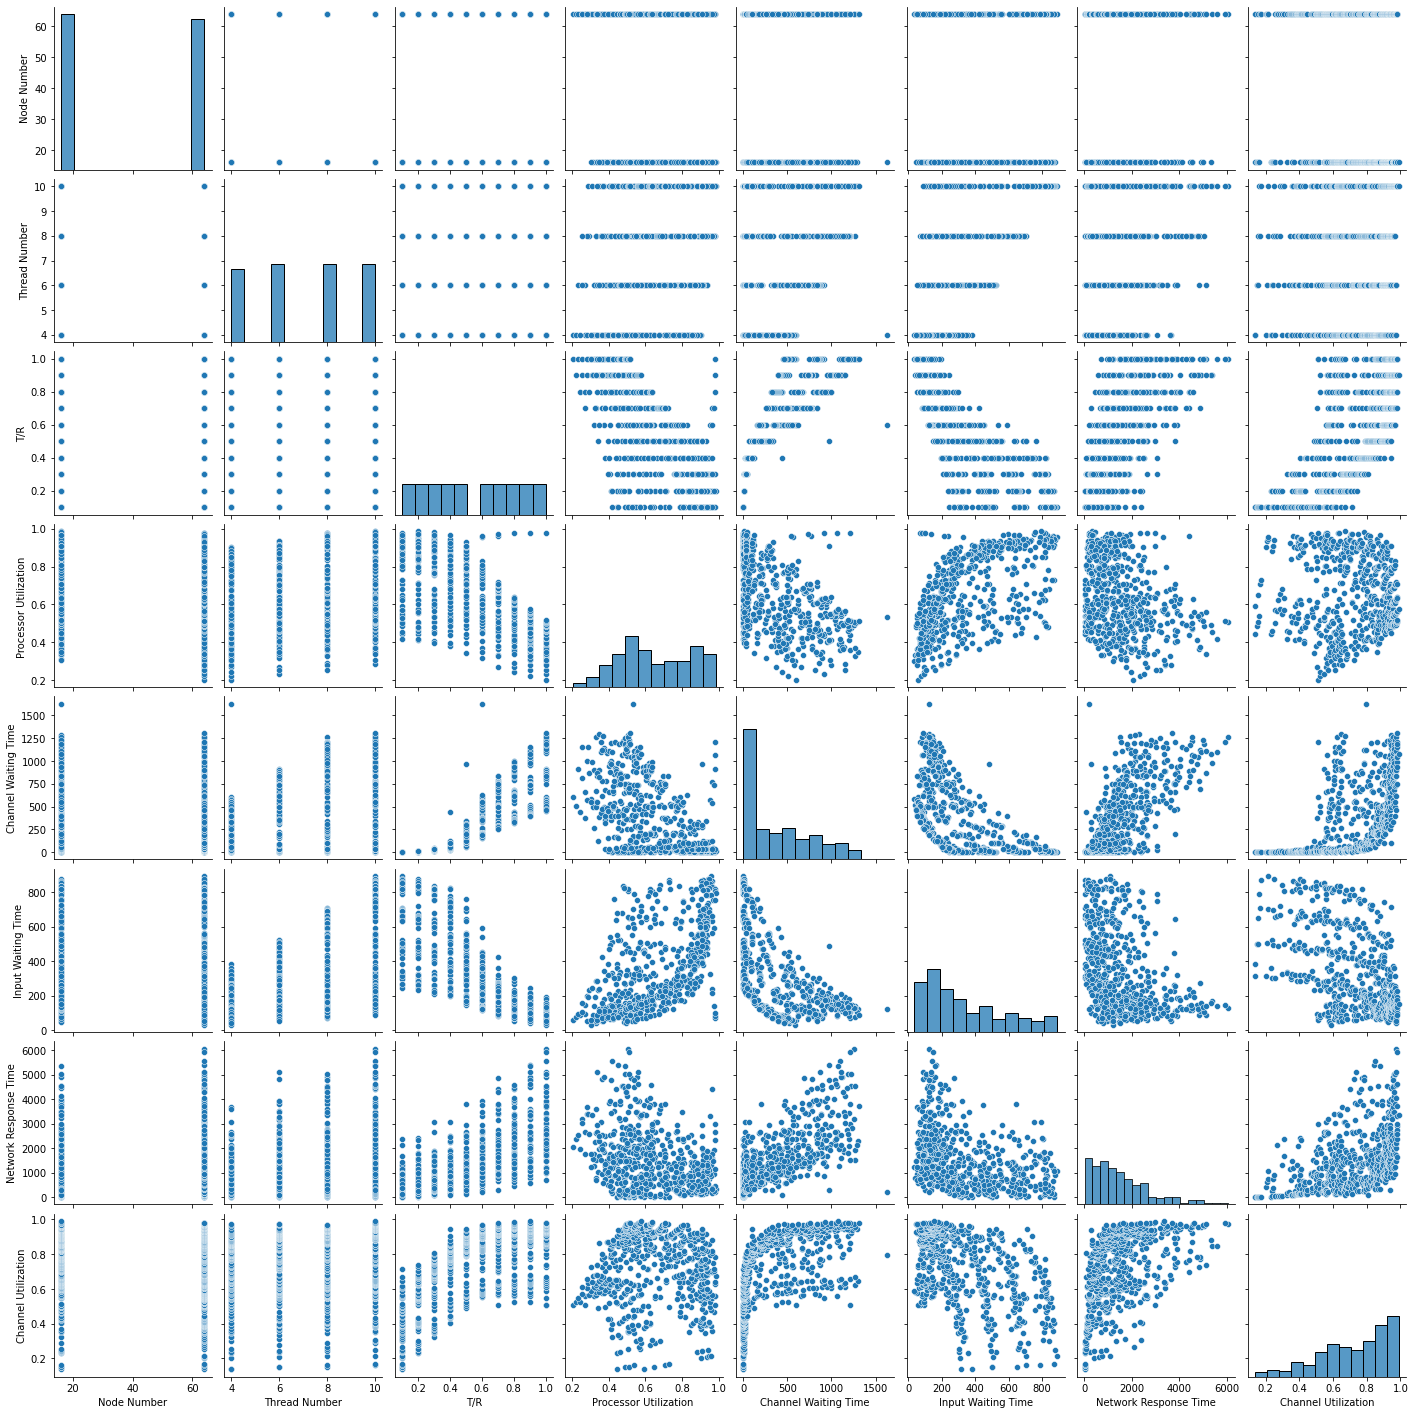

In [13]:
# Pairwise distributions
sns.pairplot(df_sorted)
plt.show()

#### Channel Utilization per Spatial Distribution

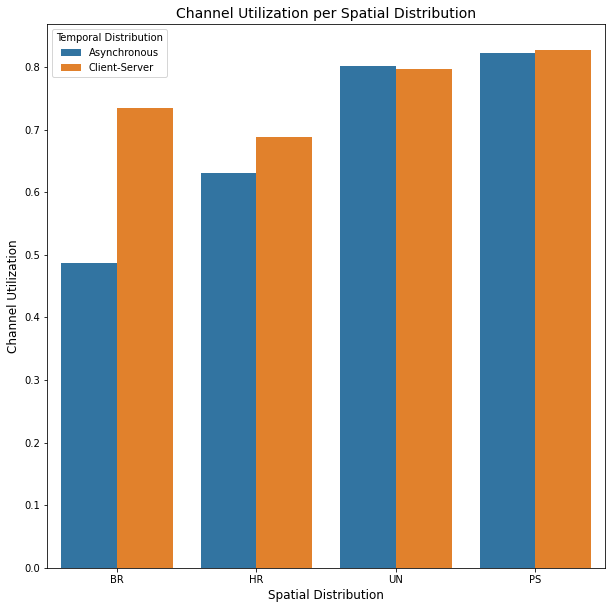

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Utilization'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

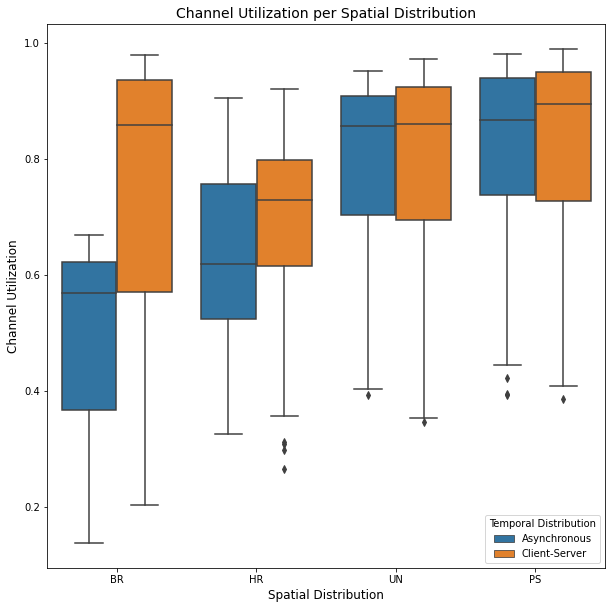

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Utilization'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

#### Channel Waiting Time per Spatial Distribution

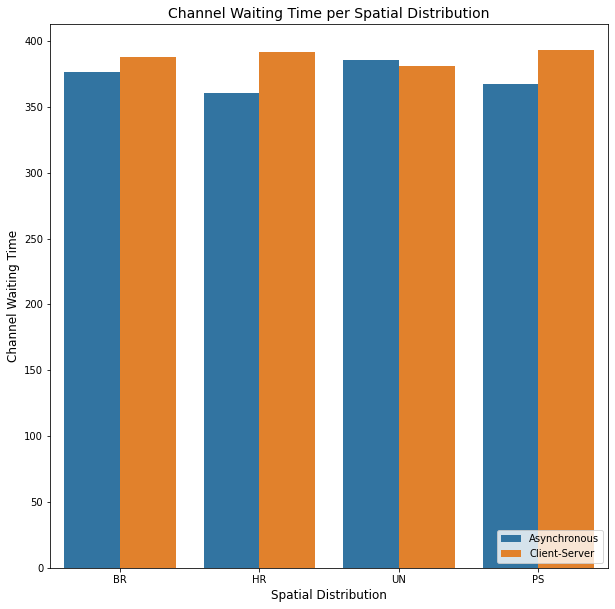

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Waiting Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.legend(loc='lower right')
plt.show()

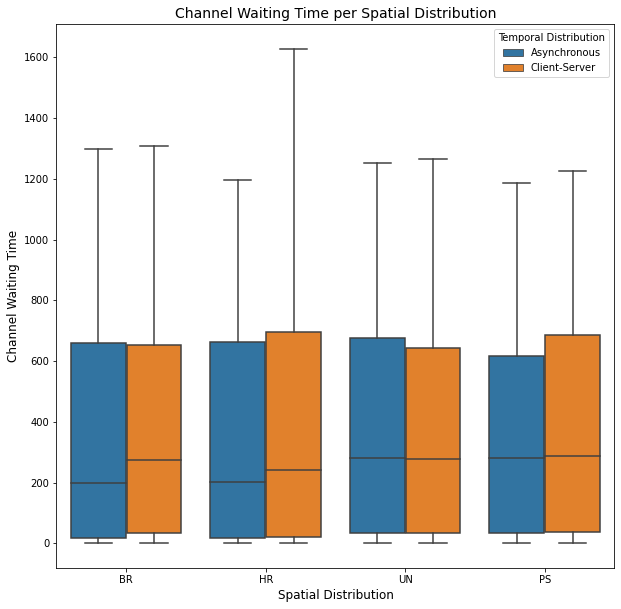

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Waiting Time'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

#### Processor Utilization per Spatial Distribution

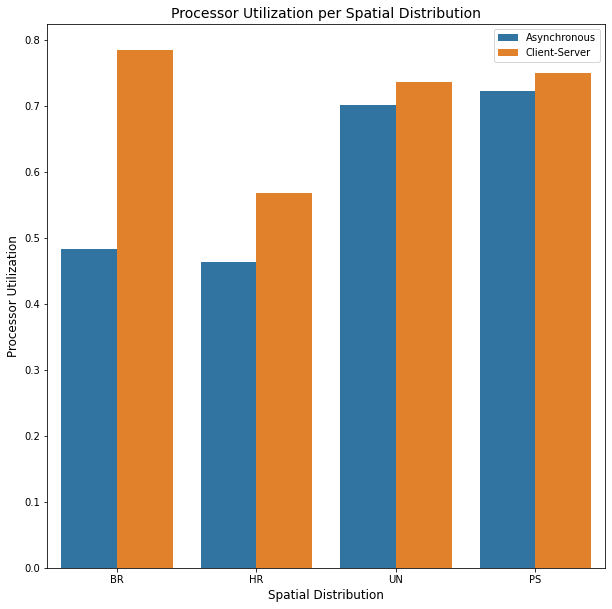

In [18]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Processor Utilization '], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.legend(loc='upper right')
plt.show()

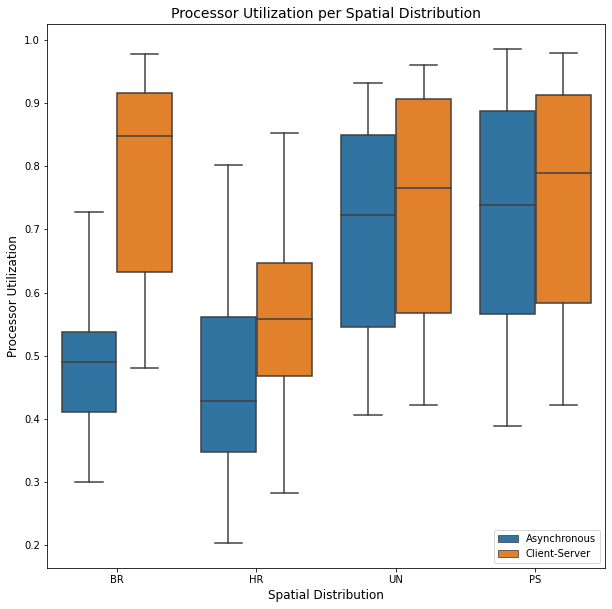

In [19]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Processor Utilization '], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.legend(loc='lower right')
plt.show()

#### Network Response Time per Spatial Distribution

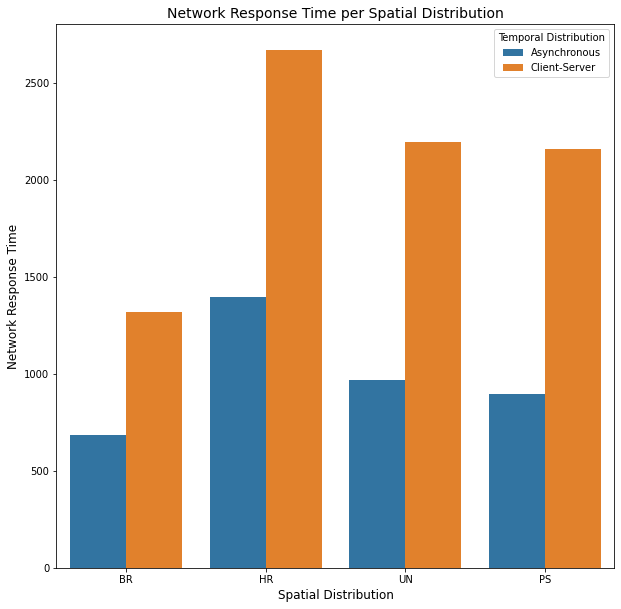

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Network Response Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

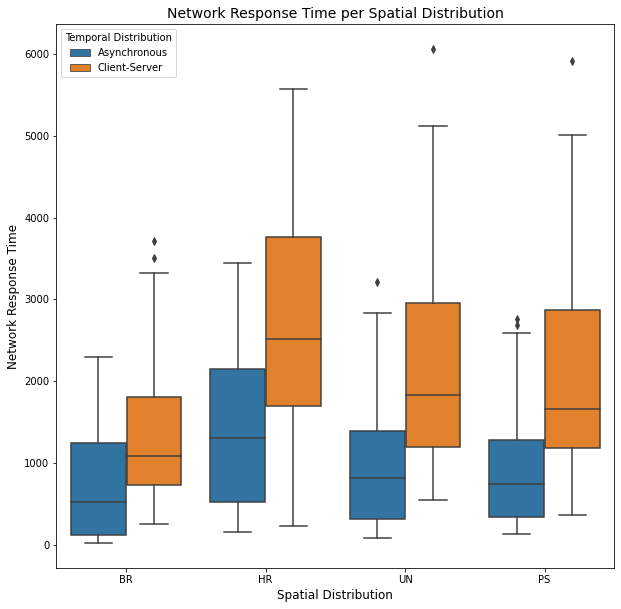

In [21]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Network Response Time'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

#### Input Waiting Time per Spatial Distribution

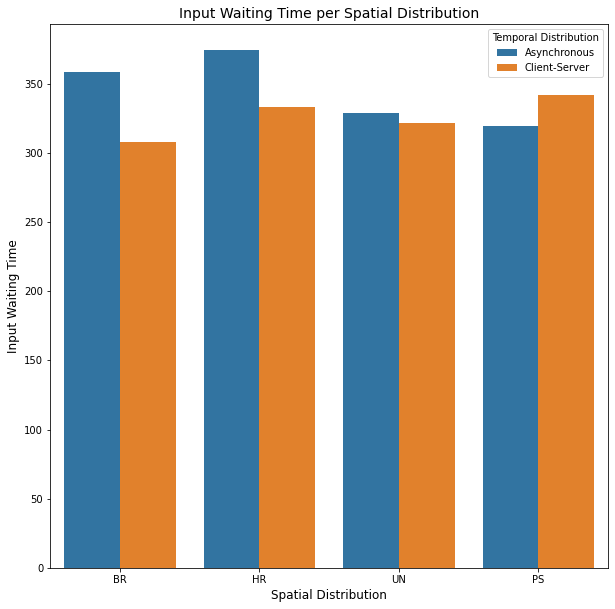

In [22]:
plt.figure(figsize=(10, 10))
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Input Waiting Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

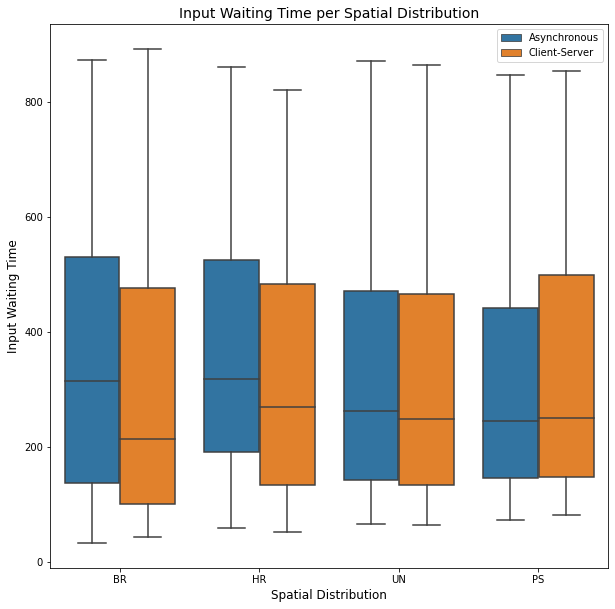

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Input Waiting Time'], 
            hue=df_sorted['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
plt.legend(loc='upper right')
plt.show()

#### Correlation Map

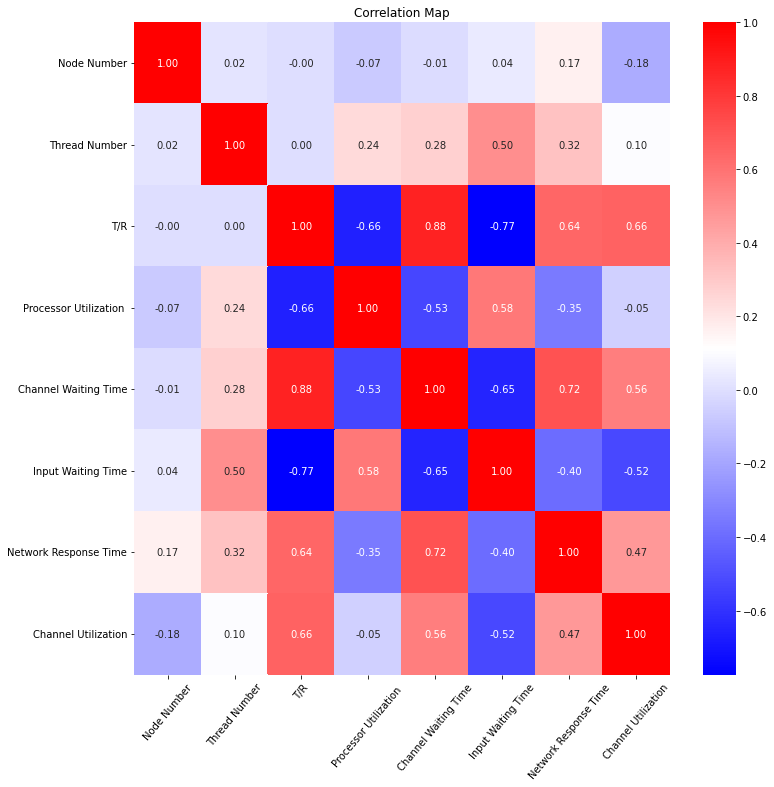

In [24]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df_sorted.corr(), cmap='bwr', annot=True, fmt = ".2f")
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [25]:
# Label Encode the Spatial Distribution column
le = LabelEncoder()
# le.fit(X[:, 2])
X[:, 2] = le.fit_transform(X[:, 2])
# X[:, 3] = le.fit_transform(X[:, 3])

In [26]:
# One-Hot Encode the Temporal Distribution column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [27]:
X[:5, :]

array([[1.0, 0.0, 16, 4, 0, 0.1, 0.44250100000000003, 1.013195,
        381.61555400000003, 19.110126],
       [1.0, 0.0, 64, 4, 0, 0.1, 0.590286, 1.474199, 313.118038,
        26.502746000000002],
       [1.0, 0.0, 16, 6, 0, 0.1, 0.487785, 1.1196959999999998,
        498.820922, 19.484081],
       [1.0, 0.0, 64, 6, 0, 0.1, 0.6481180000000001, 1.745482, 501.62453,
        21.445301],
       [1.0, 0.0, 16, 8, 0, 0.1, 0.5089090000000001, 1.3484180000000001,
        652.238802, 18.983249]], dtype=object)

In [28]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [29]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Define and Evalutate Models

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Support Vector Machine - Regression (SVR)
from sklearn.svm import SVR
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

### Linear Regression (LR)

In [31]:
lr_reg = LinearRegression()

lr_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, lr_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, lr_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, lr_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, lr_pred)))

MAE: 0.065
MSE: 0.007
RMSE: 0.082
R^2 Score: 0.847


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Validation Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.065</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.007</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.082</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.847</td>
    </tr>
  </tbody>
</table>

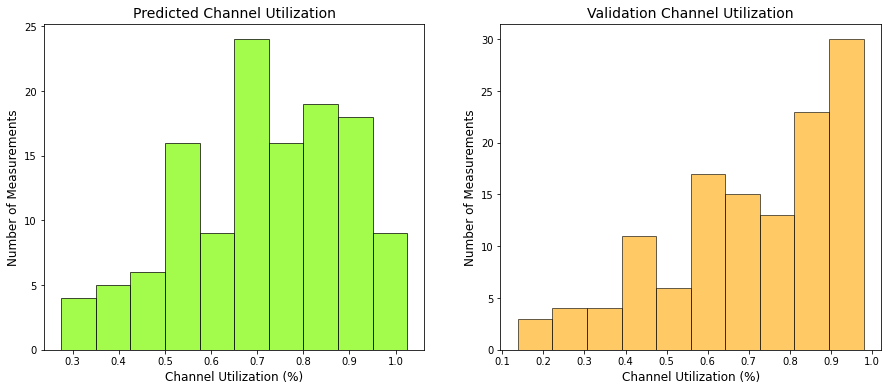

In [75]:
# Plot histogram for lr_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 1.2, 0.1))
plt.yticks(np.arange(0, 30, 5))
plt.hist(x=lr_pred, facecolor='lawngreen', alpha=0.7, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Predicted Channel Utilization', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 35, 5))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Validation Channel Utilization', fontsize=14)

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.779402
Std: +/- 0.026859
Min: 0.726634
Max: 0.830034

RMSE Scoring:
Mean: 0.094639
Std: +/- 0.007172
Min: 0.082159
Max: 0.106563


-- Fold: 2 --

R^2 Scoring:
Mean: 0.774161
Std: +/- 0.040658
Min: 0.678350
Max: 0.839064

RMSE Scoring:
Mean: 0.095474
Std: +/- 0.010422
Min: 0.080027
Max: 0.117448


-- Fold: 3 --

R^2 Scoring:
Mean: 0.771953
Std: +/- 0.063163
Min: 0.641650
Max: 0.879155

RMSE Scoring:
Mean: 0.095179
Std: +/- 0.014439
Min: 0.073126
Max: 0.127523


-- Fold: 4 --

R^2 Scoring:
Mean: 0.769236
Std: +/- 0.085148
Min: 0.517161
Max: 0.888817

RMSE Scoring:
Mean: 0.094718
Std: +/- 0.016269
Min: 0.072228
Max: 0.132927


-- Fold: 5 --

R^2 Scoring:
Mean: 0.771028
Std: +/- 0.089762
Min: 0.488349
Max: 0.882358

RMSE Scoring:
Mean: 0.094290
Std: +/- 0.017758
Min: 0.070687
Max: 0.136312


-- Fold: 6 --

R^2 Scoring:
Mean: 0.768272
Std: +/- 0.103558
Min: 0.448752
Max: 0.895297

RMSE Scoring:
Mean: 0.093928
Std: +/- 0.019589
Min: 0.063029
Max: 0.153256

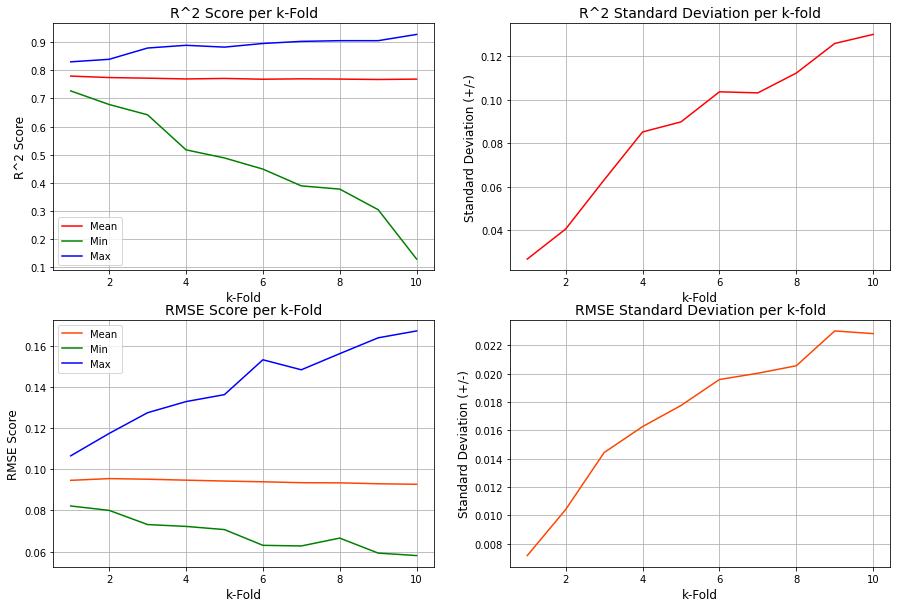

In [34]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedKFold(n_splits = k, random_state = 0)
  r2_scores = cross_val_score(lr_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(lr_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.769</td>
      <td>0.093</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.130</td>
      <td>0.023</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.129</td>
      <td>0.058</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.928</td>
      <td>0.167</td>
    </tr>
  </tbody>
</table>

### Support Vector Regression (SVR)

In [35]:
svm_reg = SVR(kernel='rbf', C=1, gamma=0.044)  # R2
# svm_reg = SVR(kernel='rbf', C=1, gamma=0.044)  # RMSE

svm_reg.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.044,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
# Predict test set results
svm_pred = svm_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, svm_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, svm_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, svm_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, svm_pred)))

MAE: 0.055
MSE: 0.004
RMSE: 0.065
R^2 Score: 0.903


<table border = "1">
  <thead>
    <th colspan = "5">SVR Validation Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.055</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.004</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.065</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.903</td>
    </tr>
  </tbody>
</table>

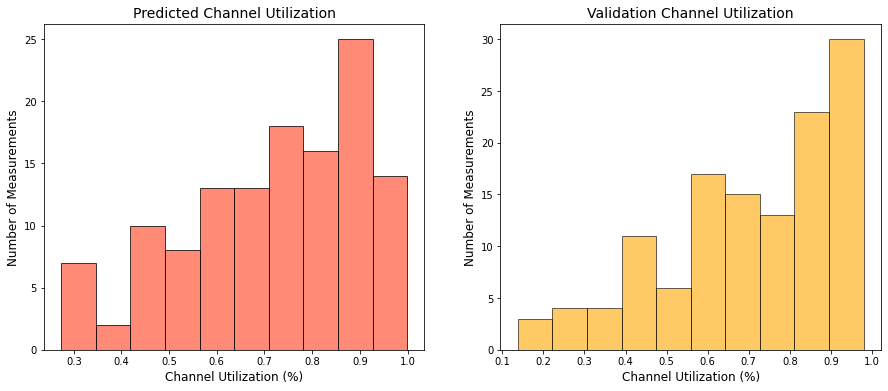

In [76]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 30, 5))
plt.hist(x=svm_pred, facecolor='tomato', alpha=0.75, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Predicted Channel Utilization', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 35, 5))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Validation Channel Utilization', fontsize=14)

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.879580
Std: +/- 0.014283
Min: 0.842855
Max: 0.899601

RMSE Scoring:
Mean: 0.069862
Std: +/- 0.004131
Min: 0.063571
Max: 0.078609


-- Fold: 2 --

R^2 Scoring:
Mean: 0.891920
Std: +/- 0.013489
Min: 0.863144
Max: 0.916577

RMSE Scoring:
Mean: 0.066012
Std: +/- 0.003070
Min: 0.058349
Max: 0.070351


-- Fold: 3 --

R^2 Scoring:
Mean: 0.893813
Std: +/- 0.016136
Min: 0.849713
Max: 0.916908

RMSE Scoring:
Mean: 0.065232
Std: +/- 0.004029
Min: 0.058771
Max: 0.077156


-- Fold: 4 --

R^2 Scoring:
Mean: 0.893667
Std: +/- 0.025759
Min: 0.748149
Max: 0.918853

RMSE Scoring:
Mean: 0.064873
Std: +/- 0.004629
Min: 0.057810
Max: 0.088372


-- Fold: 5 --

R^2 Scoring:
Mean: 0.897001
Std: +/- 0.018191
Min: 0.845902
Max: 0.923782

RMSE Scoring:
Mean: 0.064038
Std: +/- 0.004264
Min: 0.055954
Max: 0.074240


-- Fold: 6 --

R^2 Scoring:
Mean: 0.896381
Std: +/- 0.018382
Min: 0.842907
Max: 0.931476

RMSE Scoring:
Mean: 0.063943
Std: +/- 0.003987
Min: 0.055111
Max: 0.073297

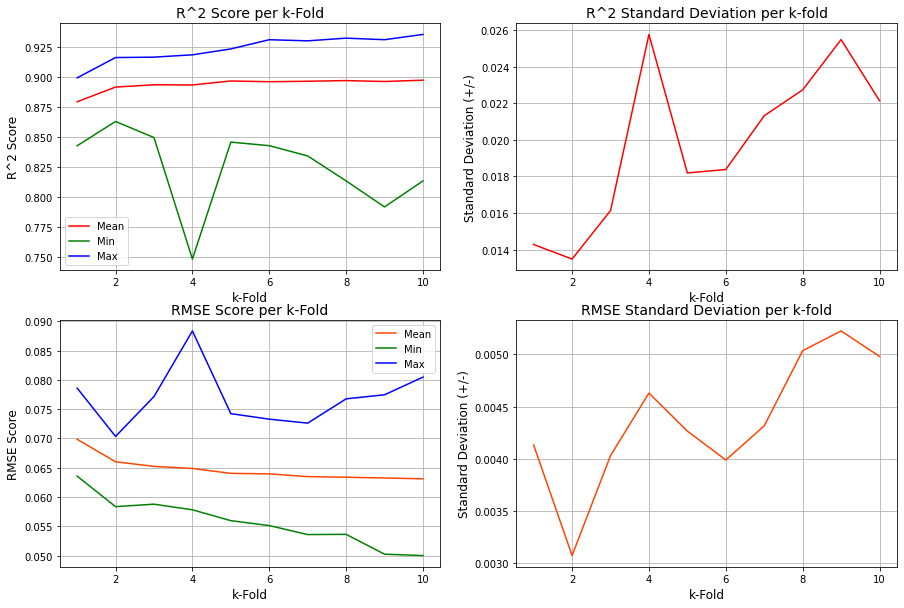

In [38]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedKFold(n_splits = k, random_state = 0)
  r2_scores = cross_val_score(svm_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(svm_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(svm_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(svm_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">SVR Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.898</td>
      <td>0.063</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.022</td>
      <td>0.005</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.814</td>
      <td>0.050</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.936</td>
      <td>0.081</td>
    </tr>
  </tbody>
</table>

In [39]:
# Apply Grid Search for parameter tuning

# svm_params = [{'C': [0.25, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                'kernel': ['linear']},
#               {'C': [0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                'kernel': ['rbf'],
#                'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

# R2 Scoring
svm_params = {'C': [1], 
              'kernel': ['rbf'],
              'gamma': [0.043, 0.044, 0.045]}

# RMSE
# svm_params = {'C': [1], 
#               'kernel': ['rbf'],
#               'gamma': [0.043, 0.044, 0.044]}

# svm_grid = GridSearchCV(svm_reg, svm_params, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# svm_grid = GridSearchCV(svm_reg, svm_params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# svm_grid = GridSearchCV(svm_reg, svm_params, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
svm_grid = GridSearchCV(svm_reg, svm_params, scoring='r2', cv=cv, n_jobs=-1)
results = svm_grid.fit(X_train, y_train)

# Summarize results
best_score = svm_grid.best_score_
best_parameters = svm_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score * 100)))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 89.766%
Best Parameters:  {'C': 1, 'gamma': 0.044, 'kernel': 'rbf'}


<table border = "1">
  <thead>
    <th colspan = "3">SVR Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Best Score</b></td>
      <td>0.898</td>
      <td>0.063</td>
    </tr>
    <tr>
      <td colspan="3"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>kernel</b></td>
      <td>rbf</td>
      <td>rbf</td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <td><b>gamma</b></td>
      <td>0.044</td>
      <td>0.044</td>
    </tr>
    </tr>
  </tbody>
</table>


### XGBoost (XGB)

In [58]:
xgb_reg = XGBRegressor(max_depth=5, n_estimators=161, learning_rate=0.075, 
                       random_state=0)

xgb_reg.fit(X_train, y_train)

[20:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.075, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=161,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
# Predict test set results
xgb_pred = xgb_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, xgb_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, xgb_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, xgb_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, xgb_pred)))

MAE: 0.021
MSE: 0.001
RMSE: 0.030
R^2 Score: 0.980


<table border = "1">
  <thead>
    <th colspan = "5">XGBoost Validation Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.021</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.001</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.030</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.980</td>
    </tr>
  </tbody>
</table>

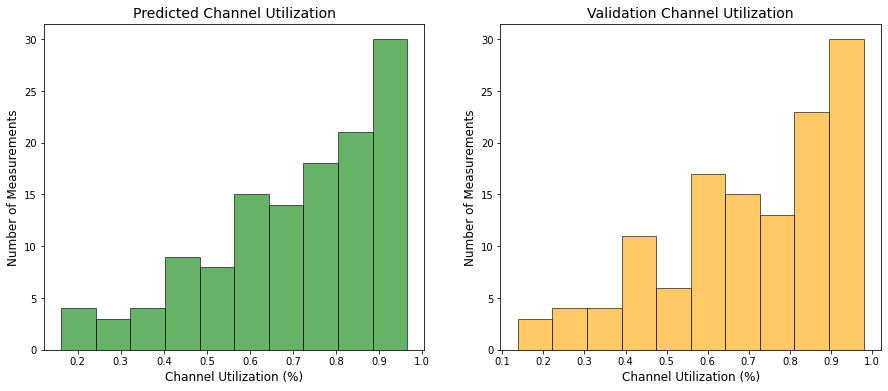

In [77]:
# Plot histogram for lgb_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 40, 5))
plt.hist(x=xgb_pred, facecolor='green', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Predicted Channel Utilization', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 35, 5))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization (%)', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Validation Channel Utilization', fontsize=14)

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.953884
Std: +/- 0.008394
Min: 0.941448
Max: 0.972606

RMSE Scoring:
Mean: 0.043069
Std: +/- 0.003722
Min: 0.034585
Max: 0.048509


-- Fold: 2 --

R^2 Scoring:
Mean: 0.965276
Std: +/- 0.007976
Min: 0.946054
Max: 0.980517

RMSE Scoring:
Mean: 0.037210
Std: +/- 0.003709
Min: 0.029619
Max: 0.046200


-- Fold: 3 --

R^2 Scoring:
Mean: 0.966365
Std: +/- 0.011248
Min: 0.932178
Max: 0.983950

RMSE Scoring:
Mean: 0.036264
Std: +/- 0.004939
Min: 0.027355
Max: 0.053112


-- Fold: 4 --

R^2 Scoring:
Mean: 0.969945
Std: +/- 0.011803
Min: 0.904143
Max: 0.985280

RMSE Scoring:
Mean: 0.034134
Std: +/- 0.004580
Min: 0.026114
Max: 0.054519


-- Fold: 5 --

R^2 Scoring:
Mean: 0.971236
Std: +/- 0.009125
Min: 0.947904
Max: 0.985372

RMSE Scoring:
Mean: 0.033421
Std: +/- 0.004412
Min: 0.025386
Max: 0.043623


-- Fold: 6 --

R^2 Scoring:
Mean: 0.972347
Std: +/- 0.009172
Min: 0.945954
Max: 0.988149

RMSE Scoring:
Mean: 0.032622
Std: +/- 0.004362
Min: 0.021891
Max: 0.043763

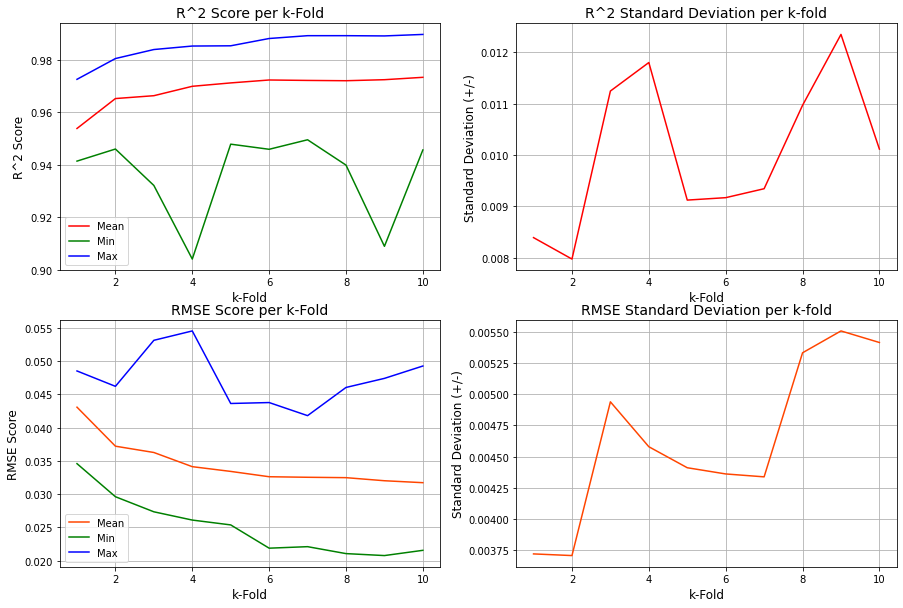

In [61]:
# Apply k-Fold Cross Validation on the training set

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedKFold(n_splits = k, random_state = 0)
  r2_scores = cross_val_score(xgb_reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(xgb_pred, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(xgb_pred, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">XGBost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.973</td>
      <td>0.032</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.010</td>
      <td>0.005</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.946</td>
      <td>0.022</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.990</td>
      <td>0.050</td>
    </tr>
  </tbody>
</table>

In [62]:
# Apply Grid Search for parameter tuning

# xgb_grid = {'max_depth': [10, 25, 50, 75, 100],
#               'n_estimators': [50, 100, 150, 200, 250],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15],
#               'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#               'num_leaves': [1, 5, 10, 20],
#               'min_split_gain': [2, 5, 10],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'reg_lambda': [0.5, 1, 1.5, 2, 5, 10],
#               'subsample': [1, 1.5, 2, 5, 10],
#               'subsample_freq': [5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2, 5, 42]}

xgb_params = {'max_depth': [5],
              'n_estimators': [161],
              'learning_rate': [0.075],
              'random_state': [0]}

# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='r2', cv=cv, n_jobs=-1)
results = xgb_grid.fit(X_train, y_train)

# Summarize results
best_score = xgb_grid.best_score_
best_parameters = xgb_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score * 100)))  # RMSE
print("Best Parameters: ", best_parameters)

[20:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: 97.337%
Best Parameters:  {'learning_rate': 0.075, 'max_depth': 5, 'n_estimators': 161, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>97.337%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.075</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>161</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

## 6. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan='2'><b>R^2</b></td>
      <td colspan='2'><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>Pred.</b></td>
      <td><b>Val.</b></td>
      <td><b>Pred.</b></td>
      <td><b>Val.</b></td>
    </tr> 
    <tr>	
      <td><b>Linear Regression (LR)</b></td>
      <td>0.769</td>
      <td>0.847</td>
      <td>0.093</td>
      <td>0.082</td>
    </tr>
    <tr>
      <td><b>Support Vector Regression (SVR)</b></td>
      <td>0.898</td>
      <td>0.903</td>
      <td>0.063</td>
      <td>0.065</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>0.973</td>
      <td>0.980</td>
      <td>0.032</td>
      <td>0.030</td>
    </tr>
  </tbody>
</table>

## 7. Remarks

**Highlights:**

- Prediction and validation scores are relatively close to each other (except for Linear Regression model).
- RMSE was relatively low (less than 0.1).
- Removed some extraneous data that indicated over 100% channel utilization. In reality, such values could indicate network congestion if there are too many devices connected which would result in greater power consumption.

**Challenges Faced:**

- Determining the number of trees for XGBoost.
- When tuning XGBoost, there were some parameters that did not yield a significant improvement in R2 or RMSE scoring (i.e: subsample).
- In both cases, I had to consider the tradeoffs between fine-tuning some parameters for greater accuracy or using lower and/or default parameter values in order to optimize speed.

**Suggested Improvements:**

- Could try evaluating with Decision Tree model to determine performance with only one tree instead of a forest.
- Could try other visualization plots (i.e: Line Charts) to determine trends in data.
